# Matplotlib

Matplotlib is an extremely power tool for plotting and visualization. You can customize the format of your figures as well! Below you will see a recommended set of format parameters that satisfy all figure requirements for the Computer Projects.  

In [118]:
import matplotlib.pyplot as plt
import matplotlib as mpl

#choose one of the following for your color map for plots! See below for the different colors
cmaps = ['viridis', 'plasma', 'inferno', 'magma', 'cividis']

params = {'image.aspect':'equal',
          'savefig.dpi':600,
          'axes.grid':True,
          'font.size':12,
          'text.color':'black',
          'text.usetex':True,
          'image.cmap':'viridis'}

mpl.rcParams.update(params)

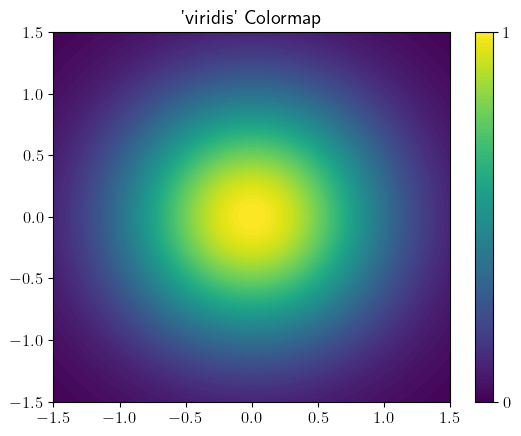

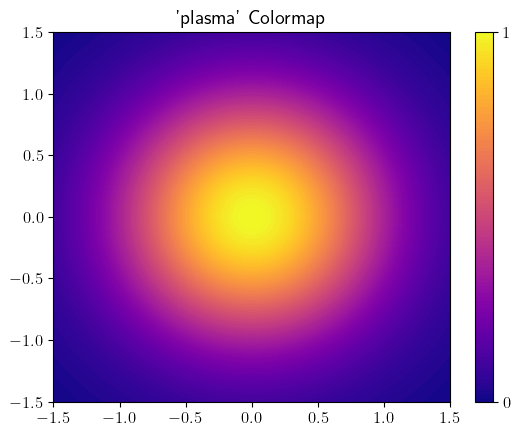

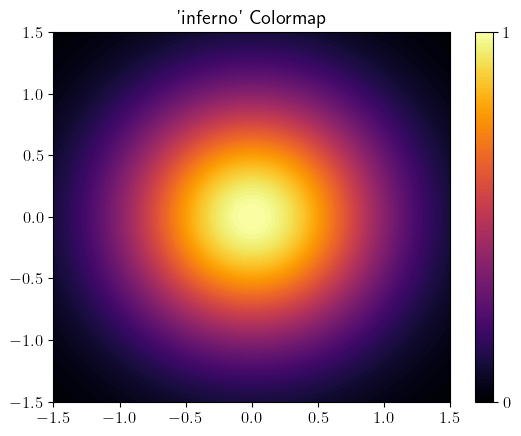

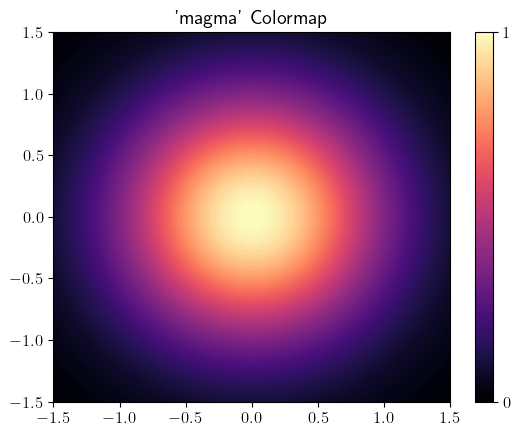

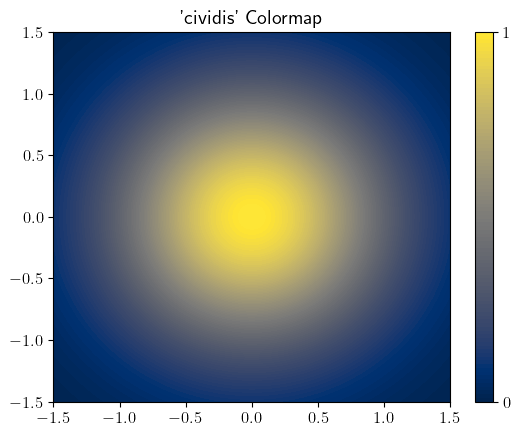

In [119]:
import numpy as np
def func(x, y):
    return np.exp(-x**2) * np.exp(-y**2)
    
x, y = np.linspace(-1.5,1.5,1000), np.linspace(-1.5,1.5,1000)
x,y = np.meshgrid(x,y)

for cmap in cmaps:
    fig, ax = plt.subplots()
    img = ax.contourf(x,y,func(x,y), levels = np.linspace(0.,1.,100), cmap = cmap)
    fig.colorbar(img, ticks = [0,1.])
    ax.set_title(f"'{cmap}' Colormap")
    ax.grid(False)
    plt.show()

You can also include $\LaTeX\:$ math in axis labels and the title!

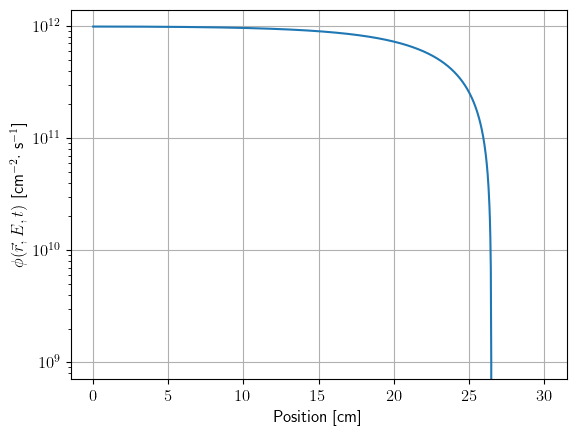

In [158]:
def func(x):
    return -1e10 * np.cosh(x/5) + 1e12

x = np.linspace(0,30,1000)
plt.semilogy(x, func(x))
plt.ylabel(r'$\phi(\vec{r}, E, t)$  [cm$^{-2}\cdot$ s$^{-1}$]')
plt.xlabel('Position  [cm]')
plt.show()